# Study on CO$_2$ concentration in the atmosphere

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The data on CO2 atmospheric concentration is made available by the [Mauna Loa Observatory](https://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo.html) in several sets. For this analysis, the weekly recordings are used, retrieved at this [link](https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv) in CSV format. Becuase these data are continously updated, an offline version is used, which has been downloaded on __October 3, 2022__.

In [56]:
data_file = './weekly_in_situ_co2_mlo_retrieved20221003.csv'

The first 44 lines of the file are comments to the dataset, therefore they are skipped with `skiprows=44`. Moreover, since no heading is included in the original dataset, columns are named as `Date` and `CO2_ppm` directly from the importing command.

In [57]:
raw_data = pd.read_csv(data_file, skiprows=44,delimiter=',',names=['Date','CO2_ppm'])
raw_data

Date  CO2_ppm
0     1958-03-29   316.19
1     1958-04-05   317.31
2     1958-04-12   317.69
3     1958-04-19   317.58
4     1958-04-26   316.48
5     1958-05-03   316.95
6     1958-05-17   317.56
7     1958-05-24   317.99
8     1958-07-05   315.85
9     1958-07-12   315.85
10    1958-07-19   315.46
11    1958-07-26   315.59
12    1958-08-02   315.64
13    1958-08-09   315.10
14    1958-08-16   315.09
15    1958-08-30   314.14
16    1958-09-06   313.54
17    1958-11-08   313.05
18    1958-11-15   313.26
19    1958-11-22   313.57
20    1958-11-29   314.01
21    1958-12-06   314.56
22    1958-12-13   314.41
23    1958-12-20   314.77
24    1958-12-27   315.21
25    1959-01-03   315.24
26    1959-01-10   315.50
27    1959-01-17   315.69
28    1959-01-24   315.86
29    1959-01-31   315.42
...          ...      ...
3257  2022-01-15   418.03
3258  2022-01-22   418.33
3259  2022-01-29   419.08
3260  2022-02-05   418.74
3261  2022-02-12   418.90
3262  2022-02-19   418.79
3263  2022-02-26   419.55
3264  2022-03-05   418.35
3265  2022-03-12   418.56
3266  2022-03-19   417.95
3267  2022-03-26   419.00
3268  2022-04-02   419.91
3269  2022-04-09   419.38
3270  2022-04-16   420.57
3271  2022-04-23   420.11
3272  2022-04-30   419.81
3273  2022-05-07   419.64
3274  2022-05-14   421.36
3275  2022-05-21   420.55
3276  2022-05-28   421.34
3277  2022-06-04   421.18
3278  2022-06-11   420.90
3279  2022-06-18   420.45
3280  2022-06-25   420.16
3281  2022-07-02   419.89
3282  2022-07-09   418.92
3283  2022-07-16   418.47
3284  2022-07-23   418.02
3285  2022-07-30   417.56
3286  2022-08-06   417.43

[3287 rows x 2 columns]

In order to check any empy row, i.e. missing data points, it is run the following command

In [58]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, CO2_ppm]
Index: []

There is no empty line in the dataset, therefore there is no line to drop.

In [59]:
data = raw_data
data

Date  CO2_ppm
0     1958-03-29   316.19
1     1958-04-05   317.31
2     1958-04-12   317.69
3     1958-04-19   317.58
4     1958-04-26   316.48
5     1958-05-03   316.95
6     1958-05-17   317.56
7     1958-05-24   317.99
8     1958-07-05   315.85
9     1958-07-12   315.85
10    1958-07-19   315.46
11    1958-07-26   315.59
12    1958-08-02   315.64
13    1958-08-09   315.10
14    1958-08-16   315.09
15    1958-08-30   314.14
16    1958-09-06   313.54
17    1958-11-08   313.05
18    1958-11-15   313.26
19    1958-11-22   313.57
20    1958-11-29   314.01
21    1958-12-06   314.56
22    1958-12-13   314.41
23    1958-12-20   314.77
24    1958-12-27   315.21
25    1959-01-03   315.24
26    1959-01-10   315.50
27    1959-01-17   315.69
28    1959-01-24   315.86
29    1959-01-31   315.42
...          ...      ...
3257  2022-01-15   418.03
3258  2022-01-22   418.33
3259  2022-01-29   419.08
3260  2022-02-05   418.74
3261  2022-02-12   418.90
3262  2022-02-19   418.79
3263  2022-02-26   419.55
3264  2022-03-05   418.35
3265  2022-03-12   418.56
3266  2022-03-19   417.95
3267  2022-03-26   419.00
3268  2022-04-02   419.91
3269  2022-04-09   419.38
3270  2022-04-16   420.57
3271  2022-04-23   420.11
3272  2022-04-30   419.81
3273  2022-05-07   419.64
3274  2022-05-14   421.36
3275  2022-05-21   420.55
3276  2022-05-28   421.34
3277  2022-06-04   421.18
3278  2022-06-11   420.90
3279  2022-06-18   420.45
3280  2022-06-25   420.16
3281  2022-07-02   419.89
3282  2022-07-09   418.92
3283  2022-07-16   418.47
3284  2022-07-23   418.02
3285  2022-07-30   417.56
3286  2022-08-06   417.43

[3287 rows x 2 columns]

For later convenience, the date column is converted into `datetime` format directly through pandas, so it can more easily get handles in any other time unit. 

In [60]:
data['Date'] = pd.to_datetime((data['Date']))

Altough there is no line to drop, some weekly observation can still be missing and not specified in the raw dataset. A consistency check is therefore performed. Between two consecutive weeks, the time difference should be zero or very small (depending on record hours). Here, since no time is specified in the dataset, it is sufficient to check whether a period larger than 7 days occurs between observations. A `missing_poins` list is built to track the missing information:

In [61]:
missing_points = []
for i in range(0,len(data)-1):
    if (data['Date'][i+1])-(data['Date'][i]) > pd.Timedelta(days=7):
        missing_points.append(str((data['Date'][i]))+' -- '+str((data['Date'][i+1])))
        print(str((data['Date'][i]))+' --> '+str(pd.Timestamp(data['Date'][i+1])))
print('\nTotal missing points: '+str(len(missing_points)))

1958-05-03 00:00:00 --> 1958-05-17 00:00:00
1958-05-24 00:00:00 --> 1958-07-05 00:00:00
1958-08-16 00:00:00 --> 1958-08-30 00:00:00
1958-09-06 00:00:00 --> 1958-11-08 00:00:00
1959-01-31 00:00:00 --> 1959-02-14 00:00:00
1959-03-07 00:00:00 --> 1959-03-21 00:00:00
1959-05-23 00:00:00 --> 1959-06-06 00:00:00
1959-08-08 00:00:00 --> 1959-08-22 00:00:00
1962-08-18 00:00:00 --> 1962-09-15 00:00:00
1962-12-22 00:00:00 --> 1963-01-05 00:00:00
1963-02-09 00:00:00 --> 1963-02-23 00:00:00
1963-04-27 00:00:00 --> 1963-05-11 00:00:00
1963-11-16 00:00:00 --> 1963-11-30 00:00:00
1964-01-18 00:00:00 --> 1964-05-30 00:00:00
1964-06-06 00:00:00 --> 1964-06-27 00:00:00
1964-08-01 00:00:00 --> 1964-08-15 00:00:00
1966-07-09 00:00:00 --> 1966-08-06 00:00:00
1966-10-29 00:00:00 --> 1966-11-12 00:00:00
1967-01-14 00:00:00 --> 1967-02-04 00:00:00
1976-06-19 00:00:00 --> 1976-07-03 00:00:00
1984-03-24 00:00:00 --> 1984-04-28 00:00:00
1985-07-27 00:00:00 --> 1985-08-10 00:00:00
2003-06-07 00:00:00 --> 2003-06-

It results that data relative to 29 weeks is not present in this dataset.

## Task 1: Make a plot that shows the superposition of a periodic oscillation and a slower systematic evolution

A first look at the data can easily come from sorting the rows in chronological order, using the date as index, and plotting the CO2 concentration column as follows.

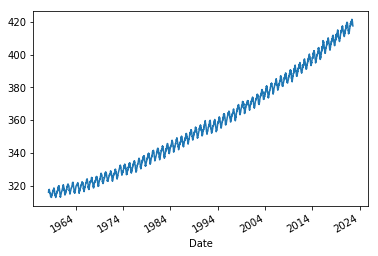

In [62]:
sorted_data = data.set_index('Date').sort_index()
sorted_data['CO2_ppm'].plot()

One observes that there is a short-period oscillation and a long-term increase of CO2 concentration. In order to extract the long term evolution, it is possible to _smooth_ the overal data using the `rolling` library from pandas. Documentation can be found at this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html#). The function is used to compute the mean value using `.mean()`, specifying the window in this case equal to `60` weeks and centering the windows with `center=True`. The raw data and the 60-days moving average are plotted.

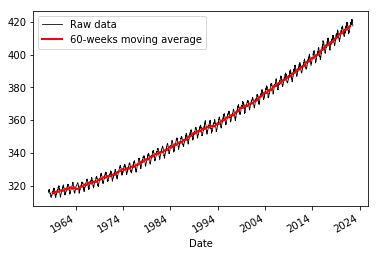

In [63]:
sorted_data['mov_avg'] = sorted_data['CO2_ppm'].rolling(60,center=True).mean()

sorted_data['CO2_ppm'].plot(lw=.8,color='k',label='Raw data')
sorted_data['mov_avg'].plot(lw=2,color='r',label='60-weeks moving average')
plt.legend()

## Task 2.1: Characterize the periodic oscillation 

To characterize the periodic oscillation, we can at first have a look in a smaller region of the dataset, plotted removing the average value computed beforehand.

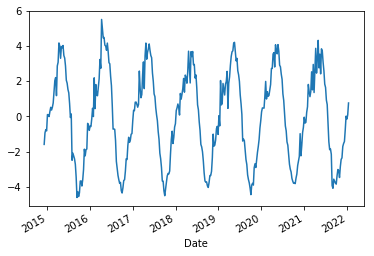

In [64]:
(sorted_data['CO2_ppm']-sorted_data['mov_avg'])[-400:].plot()

It is clear that the oscillation is quite constant and it resembles to have a period of approximately 1 year. To compute the period quantitatively, one has to identify the location of local maxima and/or minima. The library [scipy.signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html) allows to easily address this task.  At first, the data is smoothed as shown before but using a period of 15 weeks in this case, as we want to follow the oscillations. Afterwards, local minima and local maxima are found defining the values of the dataframe, i.e. `sorted_data['hf'].values` in this case, and the window within which to look for the minimum/maximum by feeding the command `order=` that is set to 30 weeks in this analysis. 

The raw dataset along with the smoothed oscillations and local maxima/minima are inferred below.

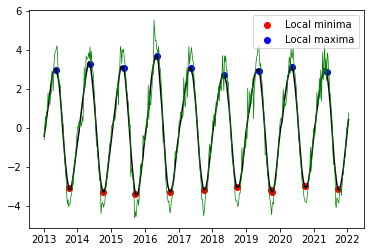

In [65]:
from scipy.signal import argrelextrema

sorted_data['hf'] = sorted_data['CO2_ppm'].rolling(15,center=True).mean()

gap = 30

sorted_data['min'] = sorted_data.iloc[argrelextrema(sorted_data.hf.values, np.less_equal,order=gap)[0]]['hf']
sorted_data['max'] = sorted_data.iloc[argrelextrema(sorted_data.hf.values, np.greater_equal,order=gap)[0]]['hf']

plt.scatter(sorted_data.index[-500:], (sorted_data['min']-sorted_data['mov_avg'])[-500:], c='r',label='Local minima')
plt.scatter(sorted_data.index[-500:], (sorted_data['max']-sorted_data['mov_avg'])[-500:], c='b',label='Local maxima')
plt.plot(sorted_data.index[-500:], (sorted_data['hf']-sorted_data['mov_avg'])[-500:],c='k')
plt.plot(sorted_data.index[-500:], (sorted_data['CO2_ppm']-sorted_data['mov_avg'])[-500:],c='g',lw=.7)
plt.legend()

To compute the elapsed time between two consecutive minima and maxima, some manipulation is required because the dataframe contatins `NaN` values. Therefore, an array containing only the row that are non-`NaN` is built checking each row of the `sorted_data['min']` dataframe. After that, the delta in time is computed in days and printed as average.

In [66]:
minima_dates = []
for i in range(0,len(sorted_data)):
    if ~np.isnan(sorted_data['min'][i]):
        minima_dates.append(sorted_data.index[i])
        
time_delta = []        
for i in range(0,len(minima_dates)-1):
    time_delta.append((minima_dates[i+1]-minima_dates[i]).days)
avg_minima = int(np.mean((time_delta)))
print('Mean Period inferred from minima: '+str(avg_minima)+' days')

Mean Period inferred from minima: 365 days


The same procedure can be applied regarding the local maxima.

In [67]:
maxima_dates = []
for i in range(0,len(sorted_data)):
    if ~np.isnan(sorted_data['max'][i]):
        maxima_dates.append(sorted_data.index[i])

time_delta = []        
for i in range(0,len(maxima_dates)-1):
    time_delta.append((maxima_dates[i+1]-maxima_dates[i]).days)
avg_maxima = int(np.mean((time_delta)))
print('Mean Period inferred from maxima: '+str(avg_maxima)+' days')

Mean Period inferred from maxima: 371 days


Eventually, a more refined period is computed as the average between the previous two, reading approximately 1 year as expected from visual inspection of the plot.

In [68]:
print('Average mean period: '+str(int(np.mean([avg_minima,avg_maxima])))+' days')

Average mean period: 368 days


The amplitude of the oscillations can instead be characterized by computing the `mean` and `std` of minima and maxima as follows. By visual inspection of the previous plot, one can foresee that the amplitude with respect to the low-frequency trend approximately equals 3 ppm. From this analysis it results that the oscillation amplitude is `2.92` with a standard deviation of `0.09`. 

In [69]:
mean_amplitude_min = (sorted_data['min']-sorted_data['mov_avg']).mean()
std_amplitude_min = (sorted_data['min']-sorted_data['mov_avg']).std()

mean_amplitude_max = (sorted_data['max']-sorted_data['mov_avg']).mean()
std_amplitude_max = (sorted_data['max']-sorted_data['mov_avg']).std()

mean_amplitude = np.mean([abs(mean_amplitude_min),abs(mean_amplitude_max)])
mean_std = np.std([abs(mean_amplitude_min),abs(mean_amplitude_max)],ddof=1)
print('Mean amplitude relative to low-frequency trend: '+str(mean_amplitude)+'\nwith a standard deviation of: '+str(mean_std))

Mean amplitude relative to low-frequency trend: 2.9227199394094505
with a standard deviation of: 0.09052037898782317


## Task 2.2: Find a simple model for the slow contribution, estimate its parameters, and attempt an extrapolation until 2025

In order to handle data fitting, a few libraries are needed, especially [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html). The other modules are meant to handle the time conversion.

In [70]:
import scipy.optimize
from datetime import datetime
import time

### Exponential fitting

By looking at the first plots in this document, one can speculate on the fact that the CO2 growth resembles an exponential law. For this reason, this function is used here. At first, a simple exponential function is defined, whose parameters `m`, `t` and `b` are conventional.

In [71]:
def exponential(x, m, t, b):
    return m * np.exp(-t * x) + b

An issue appears here because the fitting algorithm works with numerical quantities, whereas the `Date` column of the database has a `Timestamp` formatting. Therefore, these dates are converted in time units (weeks in this case) elapsed since 1970-1-1, so as conventional _Epoch time_. `NaN` values are dropped to avoid any issue as well. 

In [72]:
x_exp, y_exp = [], []
for i in range(0,len(sorted_data)):
    if ~np.isnan(sorted_data['mov_avg'][i]):
        x_exp.append(int(sorted_data.index[i].strftime('%s'))/(60*60*24*7))
        y_exp.append(sorted_data['mov_avg'][i])
x_exp, y_exp = np.array(x_exp),np.array(y_exp)

In this way, the analysis can start from two array, namely `x_exp` and `y_exp`, that include time and CO2 concentration, respectively. To move on towards the fitting curve, the algorithm requires a first guess for the unknown parameters. These values are provided in an array `p0` and try to grasp the final values to assist convergence. Resulting values for `m, p, t` are printed below.

In [73]:
p0 = (10, -1e-4, 100)
pars, cv = scipy.optimize.curve_fit(exponential, x_exp, y_exp, p0)
m, t, b = pars
print(pars)

[ 6.73159809e+01 -3.17501284e-04  2.58226836e+02]


Following the definition of [R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination), this coefficient is computed to quantify the goodness-of-fit. It results that `R²=0.999`, that is a rather good score.

In [74]:
squared_diffs = (y_exp - exponential(x_exp, m, t, b))**2
squared_diffs_mean = (y_exp - np.mean(y_exp))**2
R2 = 1 - np.sum(squared_diffs)/np.sum(squared_diffs_mean)
print('R² = '+str(R2))

R² = 0.9994739472916078


Eventually, data and fitting are plotted below. The extrapolation of CO2 concentration at the end of 2025 is simply addressed by computing the exponential law on a custom array `xfit` that spans up to the desired date.

CO2 atmospheric concentration at the end of 2025 equals 428.4467238328075 ppm


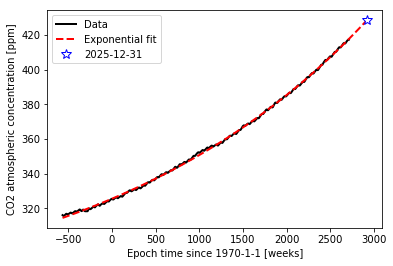

In [75]:
extr_year = 2025
xfit = np.linspace(x_exp[0],int(datetime(extr_year, 12, 31, 0, 0).strftime('%s'))/(60*60*24*7))

plt.plot(x_exp, y_exp,'-',lw=2,label='Data',color='k')
plt.plot(xfit, exponential(xfit, m, t, b), '--', lw=2,label="Exponential fit",color='r')
plt.plot(xfit[-1], exponential(xfit[-1], m, t, b), '*', ms=10,label=str(extr_year)+'-12-31',color='b',mfc='w')
plt.xlabel('Epoch time since 1970-1-1 [weeks]')
plt.ylabel('CO2 atmospheric concentration [ppm]')
plt.legend()

print('CO2 atmospheric concentration at the end of '+str(extr_year)+' equals '+str(exponential(xfit[-1], m, t, b))+' ppm')